Task: Cluster the credit card users into diﬀerent groups to find any meaningful patterns. Use
Principal Component Analysis (PCA) to reduce the dimension of the feature space and then
use the K-means algorithm to find clusters. Import relevant Python libraries.

Load dataset (CC GENERAL.csv, the name of the file when downloaded from Kaggle.)

Check for null values and handle those values.

Perform feature scaling using StandardScaler.

Perform PCA with all the columns and plot number of components vs. PCA cumulative explained variance. 

From the plot, identify the number of components required to cover 85% of the variance.

Perform PCA with 2 principal components with the aim of visualizing clustering.

Find the 2 columns which give the most covariances.

• Interpret the results of PCA by looking at the covariance matrix (use get_covariance()
method of PCA).

• Perform K Means Clustering on the 2 component PCA transformed data with clusters ranging from 2 to 11 and plot the K Means inertia against the number of clusters (Elbow Method). 

From the elbow plot, identify the ideal required number of clusters.

• Perform K Means Clustering on the 2 component PCA transformed data with the ideal
number of clusters found in the sixth bullet point.

• Visualize the clusters on a scatter plot between 1st PCA and 2nd PCA component giving
diﬀerent colors to each cluster.

In [6]:
# Step 1: Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [7]:

# Step 2: Load dataset
data = pd.read_csv('CC GENERAL.csv')
data.drop('CUST_ID', axis=1, inplace=True)

In [8]:

# Step 3: Check for null values and handle those values
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)  # Filling null values with the mean of each column


BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [9]:

# Step 4: Perform feature scaling using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


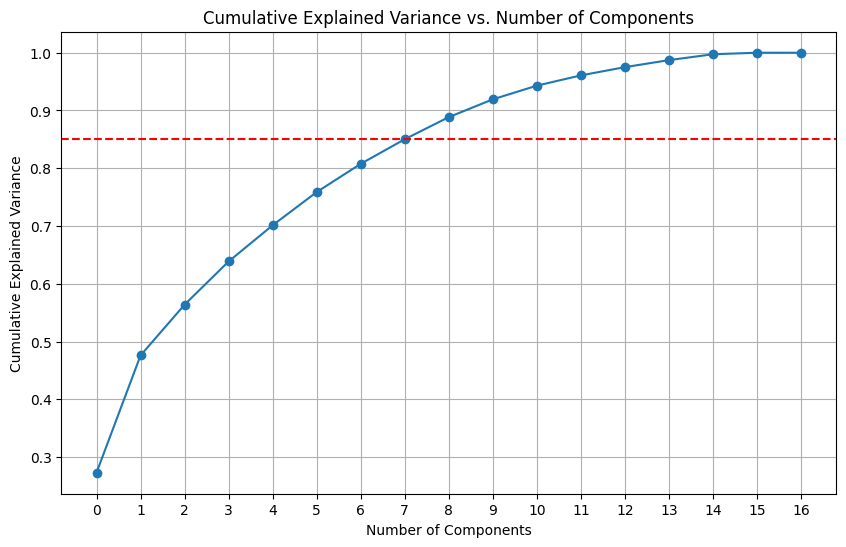

In [10]:

# Step 5: Perform PCA with all the columns
pca = PCA()
pca.fit(scaled_data)

# Plot number of components vs. PCA cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.xticks(range(len(pca.explained_variance_ratio_)))
plt.axhline(0.85, color='red', linestyle='--')
plt.show()


In [ ]:
# From the plot, determine the number of components covering 85% of the variance
num_components_85 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.85) + 1
print(f'Number of components required to cover 85% of the variance: {num_components_85}')


Number of components required to cover 85% of the variance: 8


In [ ]:
# Step 6: Perform PCA with 2 principal components for clustering
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [ ]:
# Step 7: Find the 2 columns which give the most covariances
cov_matrix = np.cov(scaled_data.T)  # Calculate covariance matrix
most_cov = np.unravel_index(np.argmax(np.abs(cov_matrix), axis=None), cov_matrix.shape)
print(f'Columns with the most covariances: {data.columns[most_cov[0]]} and {data.columns[most_cov[1]]}')

Columns with the most covariances: PURCHASES and PURCHASES


In [ ]:
# Step 8: Interpret results of PCA by looking at covariance matrix
pca_covariance = pca.get_covariance()
print('Covariance matrix of the PCA components:')
print(pca_covariance)

Covariance matrix of the PCA components:
[[ 1.10168167  0.19978101  0.21571013  0.2142381   0.11634261  0.49750956
  -0.08876349  0.09979609 -0.09383525  0.46464733  0.46463958  0.13738239
   0.36208447  0.40610723  0.21742777 -0.1653374   0.02813804]
 [ 0.19978101  0.70102009  0.2152313   0.1916936   0.15666783  0.15251568
   0.08497215  0.13640882  0.06679424  0.11863595  0.13294592  0.18251498
   0.19183414  0.22535743  0.09159653 -0.0067231   0.03773544]
 [ 0.21571013  0.2152313   1.28439212  0.58428641  0.55876387  0.01263529
   0.51304705  0.48858602  0.43656186 -0.09754737 -0.03180541  0.64839724
   0.38049836  0.47361159  0.1200914   0.19773744  0.13442578]
 [ 0.2142381   0.1916936   0.58428641  1.09080689  0.46871348  0.04620268
   0.416293    0.40970632  0.35291501 -0.04693668  0.00722495  0.54407253
   0.33952735  0.41940682  0.11458121  0.15101292  0.11277242]
 [ 0.11634261  0.15666783  0.55876387  0.46871348  1.05397632 -0.0550722
   0.44819704  0.40244116  0.38380143 -0.1

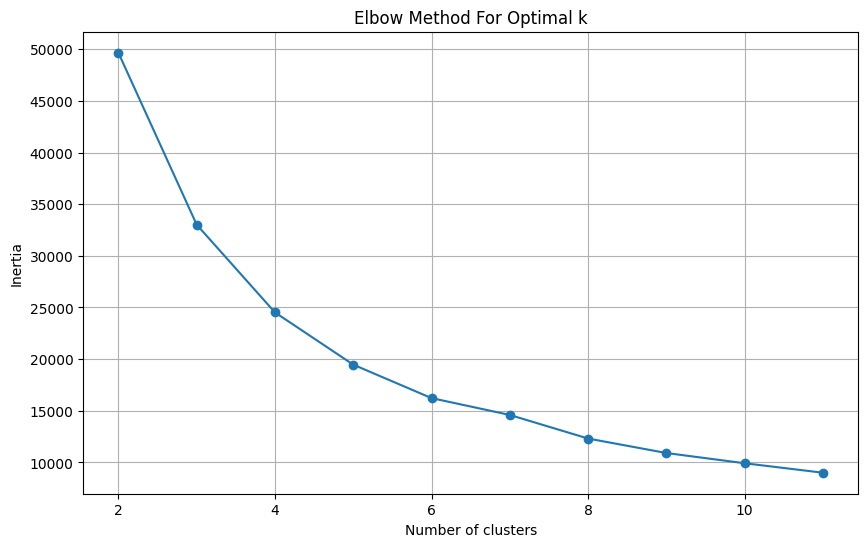

In [15]:

# Step 9: Perform K Means Clustering and plot inertia against number of clusters
inertia = []
K_range = range(2, 12)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Identify the ideal number of clusters based on the elbow method
# Visually inspect the elbow plot and choose a suitable number of clusters

In [ ]:

# Step 10: Perform K Means Clustering with the ideal number of clusters
ideal_k = 4  # Example, replace with the value identified from elbow plot
kmeans_final = KMeans(n_clusters=ideal_k, random_state=42)
clusters = kmeans_final.fit_predict(pca_result)

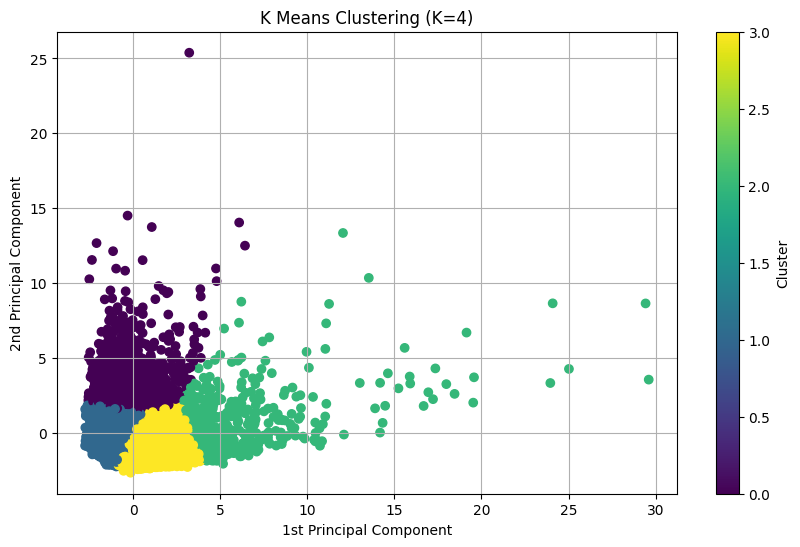

In [17]:

# Step 11: Visualize the clusters on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title(f'K Means Clustering (K={ideal_k})')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()